In [158]:
#Importing the datasets
import pandas as pd
import numpy as np


train=pd.read_csv("train_loan.csv", encoding="Latin-1")
test=pd.read_csv("test_loan.csv", encoding="Latin-1")
sample_submission=pd.read_csv("sample_submission_loan.csv", encoding="Latin-1")

print(train.info())
print(test.info())

print(train.shape)
print(test.shape)
print(sample_submission.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #

In [159]:
#For all Kaggle/Analytics Vidhya Hackathons competitions, I have used train only to divide into train and test
# As test test given in competitions will not have target variable and we don't know performance without target variable
#Hence train_test_split is used on train data to divide the train data into train vs test
#However, data preperation techniques needs to be applied both to training and testing tests
#As we don't have separate testing test here, we will apply data prep to train and split into train vs test after data prep

In [44]:
#Technique 0.1: Pandas Profiling- A single step data exploratory technique
import pandas_profiling as pdf
from pandas_profiling import ProfileReport

In [45]:
!pip install pandas_profiling

In [46]:
#Create a summary report with Pandas Profiling
pdf.ProfileReport(train)

In [160]:
#Technique 0.2: Checking the train data set to get feel of the dataset

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [161]:
#Technique 0.3: To research on the variables (thier type and number of missing values)
train.info()
#From below, you can notice that some of the features like Alley do have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [162]:
#Technique 0.4: Analyzing and researching the target variable for outliers, skewness
#As the target variable is binary, we cannot use describe which gives IQR, Quartiles
#Instead, we need to use value_counts() to see the spread accross various categories

train['Loan_Status'].value_counts()


Y    422
N    192
Name: Loan_Status, dtype: int64

In [163]:
#During the data prep steps, we won't work with Taregt for any imputation, one hot encoding 
#As the target you see above contains values like Y and N, we need to convert them into 1 and 0's 
#They are converted to 1's and 0's to compare the accuracy of train/validate after model training

cleanup_cols={"Loan_Status": {"Y":1, "N":0}}
              
train.replace(cleanup_cols, inplace=True)
train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


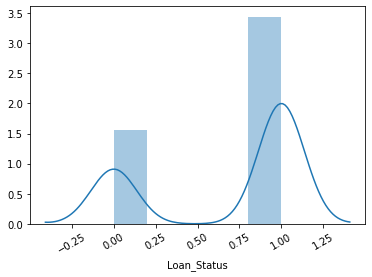

In [164]:
#Let's visualize the distribution of loan Status here
#You can see the spread of target values in the graph below

import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(train['Loan_Status'])
plt.xticks(rotation=30);

In [165]:
#Skewness is resonable and is close to 0. Hence, no transformation is needed
#even when skweness is not close to 0, we shouldn't go for transforming binary target
#Instead, if we have unequal distributions to large percentage, then we need to use SMOTE techniques

print('Skewness = ',train['Loan_Status'].skew())

Skewness =  -0.8099980938586473


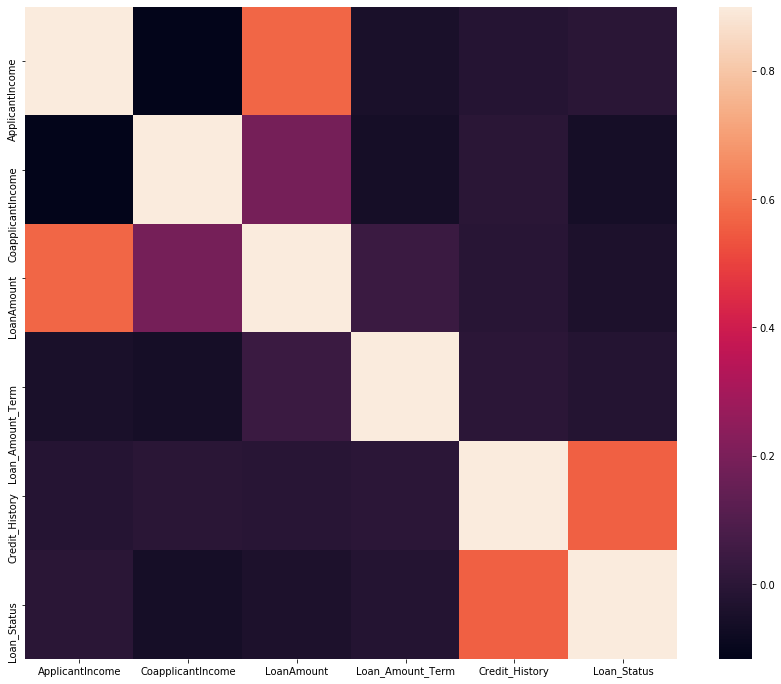

In [166]:
#Technique 0.5- Analzying more about correlated features
#In the basic steps, we are just analyzing/exploring the relationship between highly correlated variables
#Removing them will be handled later
corr = train.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr,vmax=0.9,square=True)
plt.show();

#Diagonal columns need not be worried as the same variable is plotted against x-axis and y-axis
#And no lite color anywhere which suggests that there are no two variables with very high correlation

In [167]:
#Technique 0.6- Analyzing the top features that has close relationship/strong correlation with target
#We identify the top features and check for outliers in the data for these top features
#If outliers exist for these top features, then we remove those rows/observations
#Note: The top features identified below should not contain any NULL values
#In case of null values- we can either check for null values for the top features and remove the features with null values
# (OR) Completely skip this Technique 0.6 step and filter the outliers at the end before you build the model


#For now, let’s see how the features correlate with our target feature – SalePrice:
# correlation
corr = train.corr()
# sort in descending order
corr_top = corr['Loan_Status'].sort_values(ascending=False)[:10]
top_features = corr_top.index[1:]

corr_top

#I will save all of them(below) in my “top_features” list for reference later on.
#Below are the top features that are highly correlated with target

Loan_Status          1.000000
Credit_History       0.561678
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.021268
LoanAmount          -0.037318
CoapplicantIncome   -0.059187
Name: Loan_Status, dtype: float64

In [168]:
#Checking for null values among the top features listed below.
#This step will tell you whether you need to skip this procedure of removing outliers
#As all the columns are 0, we have no missing values in top features

train[top_features].isna().sum()

#If you see below,there are around 100 missing values in the top features. Hence, its better not to remove them now
#The initial data contains only limited observations, Below you can find that all top features contains close to 100 observations. Removing all 100 in limited data is not good. We can handle the outliers later in case of any overfitting problem

Credit_History       50
ApplicantIncome       0
Loan_Amount_Term     14
LoanAmount           22
CoapplicantIncome     0
dtype: int64

In [169]:
#This step will give you the data type for the top featues, but also non null values.
#You can also use this step to check null values as non null values are listed anyways

train[top_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Credit_History     564 non-null    float64
 1   ApplicantIncome    614 non-null    int64  
 2   Loan_Amount_Term   600 non-null    float64
 3   LoanAmount         592 non-null    float64
 4   CoapplicantIncome  614 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 24.1 KB


In [170]:
#Technique 0.7- Ground work for making data ready for data preparation
#Now, all the data preparation steps except outlier removal should be applied on train and test data
#Because for example: if you create new features in train data and if they don't appear in test data, you will get error
#And the Technique 0.6 of filtering outliers should only be applied to train rows because we cannot filter test rows as we need to predict for every test row
#Hence, we are concatenating train and test after taking care of outliers


#Before we start handling the missing values in the data, I am going to make a few tweaks to the train and test dataframes.

#I am going to concatenate the train and test dataframes into a single dataframe. 
#This will make it easier to manipulate their data. Along with that, I will make a few changes to each of them

#Store the number of rows in train dataframe to separate train and test dataframe later on
#Drop Id from train and test because it is not relevant for predicting sale prices
#Take the log transformation of target feature using np.log() to deal with the skewness in the data
#Drop the target feature as it is not present in test dataframe
#Concatenate train and test datasets


#train rows
ntrain = train.shape[0]

#save log transform of target feature
target = train['Loan_Status']
#target = train['SalePrice']

#drop Id and SalePrice from train dataframe
train.drop(['Loan_ID','Loan_Status'],inplace=True,axis=1)

#store test Id
test_id = test['Loan_ID']
#drop test Id
test.drop(['Loan_ID'],inplace=True,axis=1)

#concatenate train and test dataframes
train = pd.concat([train,test])

#Now train contains all rows of train+test

In [171]:
#Data Preparation Starts here

#Technique 1: One Hot Encoding

#Note: Label Encoding can be done only with Categorical data types if we require certain values like Small=1, M-2, Large-3
#Custom binary encoding can be done with categorical variables that has 2 values like 0 and 1
#For now, I have done One Hot Encoding for all categorical variables
#For other encoding, check codes from All_DataPrep_Steps Notebook

#One Hot Encoding should only be applied only to categorical variables

#In order to create these numerical features from categorical more accurately, we can analzye the cat columns more detailed
# and check if the cat columns do have 2 domain code values/ or if there is any order in categories like ordinal varaible

#1)In case of only 2 domain code values for cat variable- you can just use label encoding like 0/1 for same column
#instead of 2 columns which will be created via One Hot Encoding

#2) In case of cat variable- with more than 2 categories, we can also analyze if that variable is ordinal variable 
#rather than nominal. In case of ordinal, there will be some natural order. Hence, you can use 1-Small, 2-Medium,3-Large
# for the same variable instead of creating 3 variables with OneHot Encoding

#However, I haven't followed 1) and 2) listed above and directly used OneHot Encoding, but you can use it to get more
#accurate columns

#Categorical prints the entire dataset
categorical = train.select_dtypes(include='object')
#Categorical_cols gives you the columns
categorical_cols=categorical.columns
#Categorical_cols_list will give you the columns in the form of list
categorical_cols_list=list(categorical_cols)

print(categorical_cols_list)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [172]:
#del train_new #This statement is used to delete the dataframe that is already created and doesn't apply duriing first run

In [173]:
#1.1 (contd) Creating categorical encoded variabels and adding them to the dataset

train_new=train #Here you are copying the train dataset into train_new

#You need to make sure to use prefix and prefix sep and column in order to get meaningful column names
# that has ColumnName_DomainCode value for that column

for column in categorical_cols_list:
    train_new= pd.concat([train_new,pd.get_dummies(train_new[column], prefix=column,prefix_sep='_', columns=categorical_cols_list)],axis=1)
    train_new=train_new
    
train_new.head()

#Checking whether the domain code values of that column matches with the created column names using value_counts for 2 var.

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,...,0,0,0,1,0,1,0,0,0,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,...,1,0,0,1,0,1,0,1,0,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,...,0,0,0,1,0,0,1,0,0,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,...,0,0,0,0,1,1,0,0,0,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,...,0,0,0,1,0,1,0,0,0,1


In [174]:
#When you see the train_new dataset at the end, you noticed that the original categorical variables also appeared 
#It's time to remove them so that subsequent dataset contains only numeric features

train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   957 non-null    object 
 1   Married                  978 non-null    object 
 2   Dependents               956 non-null    object 
 3   Education                981 non-null    object 
 4   Self_Employed            926 non-null    object 
 5   ApplicantIncome          981 non-null    int64  
 6   CoapplicantIncome        981 non-null    float64
 7   LoanAmount               954 non-null    float64
 8   Loan_Amount_Term         961 non-null    float64
 9   Credit_History           902 non-null    float64
 10  Property_Area            981 non-null    object 
 11  Gender_Female            981 non-null    uint8  
 12  Gender_Male              981 non-null    uint8  
 13  Married_No               981 non-null    uint8  
 14  Married_Yes              9

In [175]:
#1.2 Removing all the categorical columns, there by preserving only numeric features
#Make sure the data types you are entering below covers all the data types of the features using above info()

numerics = ['int16','uint8','int32', 'int64', 'float16', 'float32', 'float64']
#Numeric prints the entire dataset
numeric = train_new.select_dtypes(include=numerics)
#Numeric_cols gives you the columns
numeric_cols=numeric.columns
#Numeric_cols_list will give you the columns in the form of list
numeric_cols_list=list(numeric_cols)

print(numeric_cols_list)

train_new=train_new[numeric_cols_list]

train_new.head()

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban']


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,NaN,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [176]:
#Now, you could see only numeric features in train_new dataset
train_new.shape

(981, 20)

In [177]:
#Technique 2: Handling Missing data

#Null values
train_new.isna().sum().sort_values(ascending=False).head(20)

#You can see the list of missing values for each column sorted in descending order

Credit_History             79
LoanAmount                 27
Loan_Amount_Term           20
Property_Area_Urban         0
Property_Area_Semiurban     0
CoapplicantIncome           0
Gender_Female               0
Gender_Male                 0
Married_No                  0
Married_Yes                 0
Dependents_0                0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Education_Graduate          0
Education_Not Graduate      0
Self_Employed_No            0
Self_Employed_Yes           0
Property_Area_Rural         0
ApplicantIncome             0
dtype: int64

In [178]:
train_new.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,NaN,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [179]:
#2.1 Finding out missing values in the form of List so that you can copy in the later part of code to drop them
#after you perform the imputation

train_new.columns[train_new.isnull().any()]

missing_columns=train_new.columns[train_new.isnull().any()]

print(missing_columns)

Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History'], dtype='object')


In [180]:
#2.2 Simple Random Imputation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model


def random_imputation(train_new, feature):

    number_missing = train_new[feature].isnull().sum()
    observed_values = train_new.loc[train_new[feature].notnull(), feature]
    train_new.loc[train_new[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return train_new


for feature in missing_columns:
    train_new[feature + '_imp'] = train_new[feature]
    train_new = random_imputation(train_new, feature)
    

train_new.head()
#This method produces original column as well as imputed columns. In order to remove originla column you can use below
#However, this part is commented because Regression imputation (next technique) will automatically removed imputed
#values created here and create one ones and also will drop the original columns


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,LoanAmount_imp,Loan_Amount_Term_imp,Credit_History_imp
0,5849,0.0,NaN,360.0,1.0,0,1,1,0,1,...,1,0,1,0,0,0,1,140.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,...,1,0,1,0,1,0,0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,...,1,0,0,1,0,0,1,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,...,0,1,1,0,0,0,1,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,...,1,0,1,0,0,0,1,141.0,360.0,1.0


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,LoanAmount_imp,Loan_Amount_Term_imp,Credit_History_imp
0,5849,0.0,NaN,360.0,1.0,0,1,1,0,1,...,1,0,1,0,0,0,1,140.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,...,1,0,1,0,1,0,0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,...,1,0,0,1,0,0,1,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,...,0,1,1,0,0,0,1,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,...,1,0,1,0,0,0,1,141.0,360.0,1.0


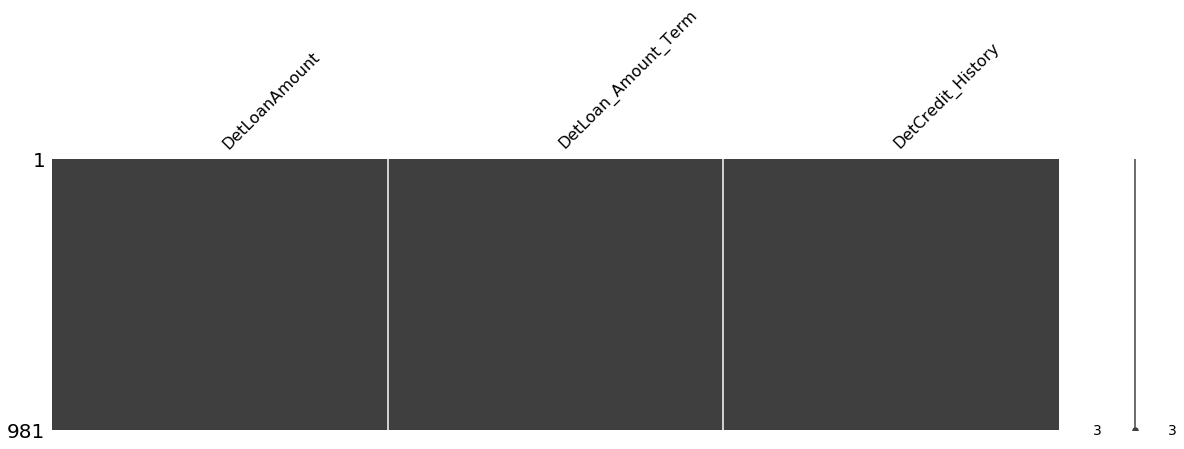

In [181]:
#2.3 Deterministic Imputation
#This imputation takes care of imputed variables created using above technique 4.1
#If the imputed variable is not created, or if this is first form of imputation in code, make sure you remove 
#feature+_imp in the list of parameters otherwise you will get error

deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
        
    deter_data["Det" + feature] = train_new[feature + "_imp"]
    parameters = list(set(train_new.columns) - set(missing_columns) - {feature + '_imp'})
    
    #Create a Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = train_new[parameters], y = train_new[feature + '_imp'])
    
    #observe that I preserve the index of the missing data from the original dataframe
    #deter_data.loc[train_new[feature].isnull(), "Det" + feature] = model.predict(train_new[parameters])[train_new[feature].isnull()]
    
    
mno.matrix(deter_data, figsize = (20,5))

train_new.head()

#Now, you can see that for all missing columns in the data, there are imputed columns created at the end
#However, the original missing columns also do appear which we need to remove

In [182]:
#2.4 Now, we are dropping original missing columns
#Missing values entered in the drop statement below can be pulled from the output of 2.1 above

print(missing_columns)
train_new=train_new.drop(['LoanAmount', 'Loan_Amount_Term', 'Credit_History'],axis=1) #Make sure you initialize to train_new. 
                                                                            #Otherwise, columns will not drop
train_new.head()


#Now, you can see that the original missing columns do not appear
#However, the imputed columns for every drop of original column appear at the end

Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History'], dtype='object')


,ApplicantIncome,CoapplicantIncome,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,LoanAmount_imp,Loan_Amount_Term_imp,Credit_History_imp
0,5849,0.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,140.0,360.0,1.0
1,4583,1508.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,128.0,360.0,1.0
2,3000,0.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,66.0,360.0,1.0
3,2583,2358.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,120.0,360.0,1.0
4,6000,0.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,141.0,360.0,1.0


In [183]:
#2.5 Imputing missing values can also be done separately for nominal, ordinal and numeric features check below link
#https://www.analyticsvidhya.com/blog/2020/06/get-started-kaggle-competitions/?utm_source=KJLinkedin&utm_medium=post&utm_campaign=24_june_new_article


In [184]:
#3.Feature Engineering
#Creation of 3 new additional features from existing columns
#Creation of additional features- requires you to understand more about the variables, business behind it
#You can create as many was you want as long as you have the correct business knowledge and fields

In [185]:
#4. Removing correlated features

##In order to avoid overfitting, feature selection should only be applied to training data
#However,we did for both train and test here

#This applies to only numeric features, you will get error when we use categorical features
#Using this step before One Hot Encoding on training data, we will not have chance to remove constant columns of 
#categorical variables because now as all variables are converted from cat to int for which we can apply 
#removal of correlated features

#4.0.1 Prep steps for correlation
#For various Variance threshold, we need to make sure all the columns are converted into int 
#Although we know all are numerical features above this step, we are just using below step to make sure 
#that all are numerical features


train_new.info() #All columns are float64, int64 and uint8

numerics = ['int16','uint8','int32', 'int64', 'float16', 'float32', 'float64']

#Numeric prints the entire dataset
numeric = train_new.select_dtypes(include=numerics)
#Numeric_cols gives you the columns
numeric_cols=numeric.columns
#Numeric_cols_list will give you the columns in the form of list
numeric_cols_list=list(numeric_cols)

print(numeric_cols_list)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          981 non-null    int64  
 1   CoapplicantIncome        981 non-null    float64
 2   Gender_Female            981 non-null    uint8  
 3   Gender_Male              981 non-null    uint8  
 4   Married_No               981 non-null    uint8  
 5   Married_Yes              981 non-null    uint8  
 6   Dependents_0             981 non-null    uint8  
 7   Dependents_1             981 non-null    uint8  
 8   Dependents_2             981 non-null    uint8  
 9   Dependents_3+            981 non-null    uint8  
 10  Education_Graduate       981 non-null    uint8  
 11  Education_Not Graduate   981 non-null    uint8  
 12  Self_Employed_No         981 non-null    uint8  
 13  Self_Employed_Yes        981 non-null    uint8  
 14  Property_Area_Rural      9

In [186]:
#del train_new_final #This deletes the dataframe in subsequent runs and it is not required in first run

In [187]:
train_new_final=pd.DataFrame() #You can use this statement to generate empty dataframe

for column in numeric_cols_list:
    #train_new[column]=train_new[column].fillna(0)- no need as imputation was performed before correlation
    train_new[column]=train_new[column].astype(int)
    train_new_final[column]=train_new[column] #This will limit the train_new_final to contain only numeric features
    
train_new_final.head()

,ApplicantIncome,CoapplicantIncome,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,LoanAmount_imp,Loan_Amount_Term_imp,Credit_History_imp
0,5849,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,140,360,1
1,4583,1508,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,128,360,1
2,3000,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,66,360,1
3,2583,2358,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,120,360,1
4,6000,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,141,360,1


In [188]:
#4.1 Handling of constant columns with Variance Threshold
from sklearn.feature_selection import VarianceThreshold

train_features=train_new_final[numeric_cols_list]

print(train_features)

constant_filter=VarianceThreshold(threshold=0)
constant_filter.fit(train_features)

#train_new_final originally contains 287 variables and after the filter of constant variance it contains 287 variables
len(train_features.columns[constant_filter.get_support()]) #This will give you number of non-contant columns

#No columns are constant columns

     ApplicantIncome  CoapplicantIncome  Gender_Female  Gender_Male  \
0               5849                  0              0            1   
1               4583               1508              0            1   
2               3000                  0              0            1   
3               2583               2358              0            1   
4               6000                  0              0            1   
..               ...                ...            ...          ...   
362             4009               1777              0            1   
363             4158                709              0            1   
364             3250               1993              0            1   
365             5000               2393              0            1   
366             9200                  0              0            1   

     Married_No  Married_Yes  Dependents_0  Dependents_1  Dependents_2  \
0             1            0             1             0             0   

20

In [189]:
#Printing contant columns

constant_columns=[column for column in train_features.columns
                 if column not in train_features.columns[constant_filter.get_support()]]

print(constant_columns) #No constant columns
print(len(constant_columns)) #0 constant columns

[]
0


In [190]:
#To remove constant features from training and test sets, we can use transform
#However, in all Kaggle competitions, we neeed to use train and divide that train into train and test

train_features=constant_filter.transform(train_features)
#test_features=constant_filter.transform(test_features)
train_new_final.shape

(981, 20)

In [191]:
#4.2 Removing Quasi Constant features
#Quasi constant features are the features that has same value for most observations of the variable
# The percentage of data points that has similar value for most observations is decided by threshold value
#For example, to find variables with 99% same value for data points, we need to use threshold value of 0.02

train_features=train_new_final[numeric_cols_list]

print(train_features)


qconstant_filter=VarianceThreshold(threshold=0.01)
qconstant_filter.fit(train_features)

#train_new_final originally contains 290 variables and 289 variables after removing target variable 
#and after the filter of quasi constant variance it contains 202 variables
#all variables are selected except one. That one is the target variable of SalePrice which is already dropped.

len(train_features.columns[qconstant_filter.get_support()]) #This will give you number of quasi non-contant columns

     ApplicantIncome  CoapplicantIncome  Gender_Female  Gender_Male  \
0               5849                  0              0            1   
1               4583               1508              0            1   
2               3000                  0              0            1   
3               2583               2358              0            1   
4               6000                  0              0            1   
..               ...                ...            ...          ...   
362             4009               1777              0            1   
363             4158                709              0            1   
364             3250               1993              0            1   
365             5000               2393              0            1   
366             9200                  0              0            1   

     Married_No  Married_Yes  Dependents_0  Dependents_1  Dependents_2  \
0             1            0             1             0             0   

20

In [192]:
#Printing quasi contant columns

qconstant_columns=[column for column in train_features.columns
                 if column not in train_features.columns[qconstant_filter.get_support()]]

print(qconstant_columns) # quasi constant column names
print(len(qconstant_columns)) #87 constant columns

[]
0


In [193]:
for column in qconstant_columns:
    print(column)

In [194]:
#To remove constant features from training and test sets, we can use transform
#However, in all Kaggle competitions, we neeed to use train and divide that train into train and test

train_features=qconstant_filter.transform(train_features)
#test_features=constant_filter.transform(test_features)


In [195]:
train_features.shape #All 20 variables (final list after removing quasi constant appear in train_features at the end)


(981, 20)

In [196]:
#4.3 Removing duplicate features 
#Features that has same values for every row, but under two variable names
#This will give you number of duplicate rows



train_features=train_new_final[numeric_cols_list]

print(train_features)


train_features_T=train_features.T
train_features_T.shape

print(train_features_T.duplicated().sum())# There is one duplication


     ApplicantIncome  CoapplicantIncome  Gender_Female  Gender_Male  \
0               5849                  0              0            1   
1               4583               1508              0            1   
2               3000                  0              0            1   
3               2583               2358              0            1   
4               6000                  0              0            1   
..               ...                ...            ...          ...   
362             4009               1777              0            1   
363             4158                709              0            1   
364             3250               1993              0            1   
365             5000               2393              0            1   
366             9200                  0              0            1   

     Married_No  Married_Yes  Dependents_0  Dependents_1  Dependents_2  \
0             1            0             1             0             0   

In [197]:
unique_features=train_features_T.drop_duplicates(keep='first').T
unique_features.shape
#One column which has duplication for all rows is removed. Hence, 289 is reduced to 288 variables as seen below

(981, 20)

In [198]:
#To find out what was that variable which got deleted due to duplication is below

duplicated_features=[dup_col for dup_col in train_features.columns if dup_col not in unique_features.columns]
duplicated_features

[]

In [199]:
#4.4 Removing correlated features using corr


train_features=train_new_final[numeric_cols_list]

print(train_features)


correlated_features=set()
correlation_matrix=train_new_final.corr()


for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j])>0.8:
            colname=correlation_matrix.columns[i]
            correlated_features.add(colname)
            


     ApplicantIncome  CoapplicantIncome  Gender_Female  Gender_Male  \
0               5849                  0              0            1   
1               4583               1508              0            1   
2               3000                  0              0            1   
3               2583               2358              0            1   
4               6000                  0              0            1   
..               ...                ...            ...          ...   
362             4009               1777              0            1   
363             4158                709              0            1   
364             3250               1993              0            1   
365             5000               2393              0            1   
366             9200                  0              0            1   

     Married_No  Married_Yes  Dependents_0  Dependents_1  Dependents_2  \
0             1            0             1             0             0   

In [200]:
print(len(correlated_features))
print(correlated_features)

4
{'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes', 'Gender_Male'}


In [201]:
print(constant_columns) #No constant columns
print(qconstant_columns) # quasi constant column names
print(duplicated_features) #Printing duplicate features
print(correlated_features) #Printing correlated features

#Now that we have all the features which needs removal, they are printed below which you can use in drop statement below
#You can see that 4 features are correlated features which needs to be removed
#Do you know why they became correlated features?
#If you observe, all the below variables like Gender, Married, Education, Self_Employed are 2 cat variables
#They have only 2 categories. If Gender_Male is 0, then obviously Gender_Female is 1 which means similar var/we don't need 2
#If we would have coded, them as Label Encoding instead of One Hot Encoding we would not have seen below 4 corr features

[]
[]
[]
{'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes', 'Gender_Male'}


In [202]:
train_new_final.shape

(981, 20)

In [203]:
#Dropping all contsant, quasi constant, duplicated and correlated features
train_new_final=train_new_final.drop(['Gender_Male', 'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes'], axis=1)

In [204]:
#So, we have total of 16 columns out of 20 after removing all contsant, quasi constant, duplicated and correlated features
train_new_final.shape

(981, 16)

In [205]:
#5. Transformations and Scaling
#Observing the skewness of the variables
#You can also plot the variables to check if the skewness is correct
train_new_final.skew().sort_values(ascending=False)

#ppp.head(70)

#print(ppp.index)

#print(pd.Series)

ApplicantIncome            7.086961
CoapplicantIncome          6.844108
Dependents_3+              2.811874
LoanAmount_imp             2.715167
Dependents_1               1.826563
Dependents_2               1.826563
Gender_Female              1.620470
Property_Area_Rural        0.897163
Property_Area_Urban        0.636294
Married_No                 0.612826
Property_Area_Semiurban    0.603504
Dependents_0              -0.223949
Education_Graduate        -1.338353
Self_Employed_No          -1.691832
Credit_History_imp        -1.846962
Loan_Amount_Term_imp      -2.488728
dtype: float64

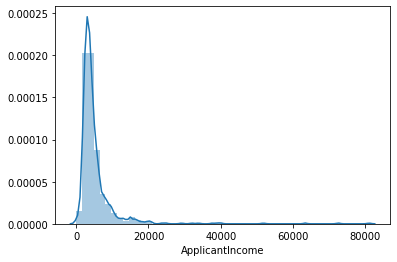

In [206]:
#Sample check for one column to make sure of the skewed distibution showed above
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(train['ApplicantIncome'])
#plt.xticks(rotation=30);

In [207]:
#5.1 Transformations
#get numeric features
numeric_features = [f for f in train_new_final.columns if train_new_final[f].dtype != object]

#transform the numeric features using log(x + 1)
from scipy.stats import skew
skewed = train_new_final[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
train_new_final[skewed] = np.log1p(train_new_final[skewed])

In [208]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_new_final[numeric_features])
scaled = scaler.transform(train_new_final[numeric_features])

for i, col in enumerate(numeric_features):
       train_new_final[col] = scaled[:,i]

In [209]:
train_new_final.info() #All columns are float64, int64 and uint8

print(train_new_final.shape)
    
train_new_final.head()

#All the feature transformations applies to the original varibales and values are changed and hence no new ones are created

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          981 non-null    float64
 1   CoapplicantIncome        981 non-null    float64
 2   Gender_Female            981 non-null    float64
 3   Married_No               981 non-null    float64
 4   Dependents_0             981 non-null    float64
 5   Dependents_1             981 non-null    float64
 6   Dependents_2             981 non-null    float64
 7   Dependents_3+            981 non-null    float64
 8   Education_Graduate       981 non-null    float64
 9   Self_Employed_No         981 non-null    float64
 10  Property_Area_Rural      981 non-null    float64
 11  Property_Area_Semiurban  981 non-null    float64
 12  Property_Area_Urban      981 non-null    float64
 13  LoanAmount_imp           981 non-null    float64
 14  Loan_Amount_Term_imp     9

,ApplicantIncome,CoapplicantIncome,Gender_Female,Married_No,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_No,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,LoanAmount_imp,Loan_Amount_Term_imp,Credit_History_imp
0,0.512808,-1.123938,-0.477268,1.351699,0.894427,-0.441457,-0.441457,-0.319761,0.534522,0.464342,-0.647828,-0.743112,1.366902,0.210013,0.274641,0.438156
1,0.172333,0.774209,-0.477268,-0.739810,-1.118034,2.265226,-0.441457,-0.319761,0.534522,0.464342,1.543619,-0.743112,-0.731581,0.020500,0.274641,0.438156
2,-0.419106,-1.123938,-0.477268,-0.739810,0.894427,-0.441457,-0.441457,-0.319761,0.534522,-2.153586,-0.647828,-0.743112,1.366902,-1.375314,0.274641,0.438156
3,-0.627977,0.890078,-0.477268,-0.739810,0.894427,-0.441457,-0.441457,-0.319761,-1.870829,0.464342,-0.647828,-0.743112,1.366902,-0.115907,0.274641,0.438156
4,0.548387,-1.123938,-0.477268,1.351699,0.894427,-0.441457,-0.441457,-0.319761,0.534522,0.464342,-0.647828,-0.743112,1.366902,0.225071,0.274641,0.438156


In [210]:
#Checking skewness after Transformation and Scaling to make verify whether skewness is improved
#You can notice that skewness is completed reduced for all varaibles when you compare skewness here and at the staring step

train_new_final.skew().sort_values(ascending=False)

Dependents_3+              2.811874
Dependents_1               1.826563
Dependents_2               1.826563
Gender_Female              1.620470
Property_Area_Rural        0.897163
Property_Area_Urban        0.636294
Married_No                 0.612826
Property_Area_Semiurban    0.603504
LoanAmount_imp            -0.161411
CoapplicantIncome         -0.200216
Dependents_0              -0.223949
Education_Graduate        -1.338353
Self_Employed_No          -1.691832
Credit_History_imp        -1.846962
Loan_Amount_Term_imp      -2.488728
ApplicantIncome           -2.761387
dtype: float64

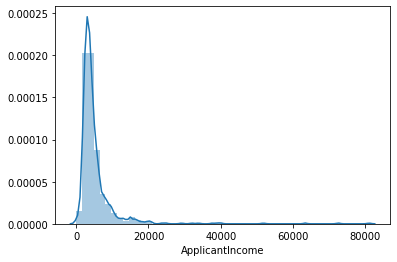

In [211]:
#Check distribution after transformation
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(train['ApplicantIncome'])
#plt.xticks(rotation=30);

In [212]:
#End of data prep steps

In [213]:
#Model Building Step 1:Now we are dividing train vs test into separately because we combined them before
##data prep steps


# train dataset
train_model = train_new_final.iloc[:ntrain,:]

# test dataset
test = train_new_final.iloc[ntrain:,:]

In [214]:
#Printing the shape of both
#Although train can have reduced number of rows due to removing/filtering obs due to outliers, test should have exactly
#same number of rows which exist in original data

print(train_model.shape)
print(test.shape)

(614, 16)
(367, 16)


In [215]:
#Model Building Step 2: Splitting the train data only into train vs test
#This is because the test data given in competitions doesn't have target variable which we cannot compare model performance
#splitting our train into train vs test will give you data from splitted train into test to compare model performance

from sklearn.model_selection import train_test_split

X = train_model
y = target

# training and validation set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=27)

#The split above happens with 4 datasets= X_train, X_test, y_train, y_test
#Below, we analyze the data that is contained in all 4 sets

In [216]:
#X_train
print(X_train.shape)
X_train.head()

(491, 16)


,ApplicantIncome,CoapplicantIncome,Gender_Female,Married_No,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_No,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,LoanAmount_imp,Loan_Amount_Term_imp,Credit_History_imp
179,-0.770041,0.764223,-0.477268,1.351699,0.894427,-0.441457,-0.441457,-0.319761,-1.870829,0.464342,-0.647828,-0.743112,1.366902,-0.459069,2.115803,-2.282293
83,0.548387,0.877925,-0.477268,-0.739810,0.894427,-0.441457,-0.441457,-0.319761,0.534522,0.464342,-0.647828,1.345692,-0.731581,1.562398,0.274641,0.438156
585,0.077836,0.952503,-0.477268,-0.739810,-1.118034,2.265226,-0.441457,-0.319761,0.534522,0.464342,1.543619,-0.743112,-0.731581,0.645794,-3.960029,0.438156
71,-1.075015,0.830665,-0.477268,-0.739810,-1.118034,-0.441457,2.265226,-0.319761,-1.870829,-2.153586,-0.647828,1.345692,-0.731581,-0.565092,0.274641,0.438156
66,-0.329031,0.878385,-0.477268,1.351699,0.894427,-0.441457,-0.441457,-0.319761,-1.870829,0.464342,-0.647828,-0.743112,1.366902,-0.012792,-2.487100,-2.282293


In [217]:
#X_test
print(X_test.shape)
X_test.head()

(123, 16)


,ApplicantIncome,CoapplicantIncome,Gender_Female,Married_No,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_No,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,LoanAmount_imp,Loan_Amount_Term_imp,Credit_History_imp
366,-0.673558,-1.123938,-0.477268,1.351699,0.894427,-0.441457,-0.441457,-0.319761,0.534522,0.464342,-0.647828,1.345692,-0.731581,-0.586944,2.115803,0.438156
282,-0.789315,0.663848,-0.477268,-0.739810,-1.118034,-0.441457,2.265226,-0.319761,0.534522,0.464342,-0.647828,-0.743112,1.366902,-1.024283,-2.487100,0.438156
37,-0.138901,0.765648,2.095259,-0.739810,0.894427,-0.441457,-0.441457,-0.319761,0.534522,0.464342,-0.647828,1.345692,-0.731581,0.269615,0.274641,0.438156
13,-1.091484,0.938294,-0.477268,1.351699,0.894427,-0.441457,-0.441457,-0.319761,0.534522,0.464342,1.543619,-0.743112,-0.731581,-0.224267,0.274641,0.438156
7,-0.402458,0.905652,-0.477268,-0.739810,-1.118034,-0.441457,-0.441457,3.127334,0.534522,0.464342,-0.647828,1.345692,-0.731581,0.465996,0.274641,-2.282293


In [218]:
#y_train
print(y_train.shape)
y_train.head()

(491,)


179    0
83     0
585    0
71     1
66     0
Name: Loan_Status, dtype: int64

In [219]:
#y_train
print(y_test.shape)
y_test.head()

(123,)


366    0
282    1
37     1
13     0
7      0
Name: Loan_Status, dtype: int64

In [220]:
#1)Model 1: Logistic Regression (Part 1)
#This Part 1 Logistic Regression predicts the values in the form of probabilities


from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#Statement where we write predictions in form of probabilities- Using proba after predict_
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
logreg.score(X_train, y_train)


#Steps to write the predictions into .csv file
model = LogisticRegression()

model.fit(X_train, y_train)


log_pred=model.predict_proba(test)[:, 1]

data_dict = {'Loan_ID':test_id,'Loan_Status':log_pred}



submit = pd.DataFrame(data_dict)
submit.to_csv('logistic_submission.csv',index=False)

submit.head()

#In Part 2- you can see that the probabilities greater than 0.5 are transformed into 0 vs 1

,Loan_ID,Loan_Status
0,LP001015,0.799584
1,LP001022,0.740874
2,LP001031,0.836531
3,LP001035,0.860402
4,LP001051,0.677576


In [221]:
#1)Model 1: Logistic Regression (Part 2)
#This Part 1 Logistic Regression predicts the values in the form 1/0's

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

#1's and 0's are predicted using predit instead of predict_proba as in Part 1
#Predict the response for splitted test dataset
y_pred = logreg.predict(X_test)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics



# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


# Model Precision: What proportion of positive identifications was actually correct?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: What proportion of actual positives was identified correctly?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Predicting the response for actual test data (unseen data) to submit it for the competition
log_pred=model.predict(test)
data_dict = {'Loan_ID':test_id,'Loan_Status':log_pred}


submit = pd.DataFrame(data_dict)
submit.to_csv('logistic_submission.csv',index=False)

submit.head()

Accuracy: 0.7886178861788617
Precision: 0.7777777777777778
Recall: 0.9767441860465116


,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [222]:
#Note: Analytics Vidhya submission format requires the predictions in form of Y and N
#Hence, all 1's are replaced with Y and all 0's are replaced with N

cleanup_cols={"Loan_Status": {1:"Y", 0:"N"}}
              
submit.replace(cleanup_cols, inplace=True)

submit.to_csv('logistic_submission.csv',index=False)
submit.head()


,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [227]:
#Model 2: XGBoost: XGBoost with several hyper parameters
import xgboost
best_xgb_model = xgboost.XGBClassifier(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
best_xgb_model.fit(X_train,y_train)
xg_model=best_xgb_model.fit(X_train,y_train)

#Predict the response for splitted test dataset
y_pred=xg_model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics


# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


# Model Precision: What proportion of positive identifications was actually correct?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: What proportion of actual positives was identified correctly?
print("Recall:",metrics.recall_score(y_test, y_pred))


#Predicting the response for actual test data (unseen data) to submit it for the competition
log_pred=xg_model.predict(test)
data_dict = {'Loan_ID':test_id,'Loan_Status':log_pred}



cleanup_cols={"Loan_Status": {1:"Y", 0:"N"}}
submit = pd.DataFrame(data_dict)
submit.replace(cleanup_cols, inplace=True)

#Writing the predictions into .csv file to submit to the Hackathon

submit.to_csv('xgboost_submission.csv',index=False)
submit.head()


Accuracy: 0.7398373983739838
Precision: 0.78125
Recall: 0.872093023255814


,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,Y


In [224]:
#Model 3: KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


#Predict the response for splitted test dataset
y_pred=knn.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics



# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


# Model Precision: What proportion of positive identifications was actually correct?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: What proportion of actual positives was identified correctly?
print("Recall:",metrics.recall_score(y_test, y_pred))


#Predicting the response for actual test data (unseen data) to submit it for the competition
log_pred=knn.predict(test)
data_dict = {'Loan_ID':test_id,'Loan_Status':log_pred}


cleanup_cols={"Loan_Status": {1:"Y", 0:"N"}}


submit = pd.DataFrame(data_dict)              
submit.replace(cleanup_cols, inplace=True)

#Writing the predictions into .csv file to submit to the Hackathon
submit.to_csv('knn_submission.csv',index=False)
submit.head()

Accuracy: 0.7154471544715447
Precision: 0.7383177570093458
Recall: 0.9186046511627907


,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [225]:
#Model 4: SVC- Support Vector Machines
from sklearn.svm import SVC
svcclassifier = SVC(kernel='linear', C=1,gamma=10, probability=True)
svcclassifier.fit(X_train, y_train)

#Predict the response for splitted test dataset
y_pred=svcclassifier.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics


# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


# Model Precision: What proportion of positive identifications was actually correct?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: What proportion of actual positives was identified correctly?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Predicting the response for actual test data (unseen data) to submit it for the competition
log_pred=svclassifier.predict(test)
data_dict = {'Loan_ID':test_id,'Loan_Status':log_pred}


cleanup_cols={"Loan_Status": {1:"Y", 0:"N"}}


submit = pd.DataFrame(data_dict)              
submit.replace(cleanup_cols, inplace=True)

#Writing the predictions into .csv file to submit to the Hackathon
submit.to_csv('svc_submission.csv',index=False)
submit.head()

Accuracy: 0.7886178861788617
Precision: 0.7777777777777778
Recall: 0.9767441860465116


,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [226]:
#Model 5: Naive Bayes Classifier

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for splitted test dataset
y_pred = gnb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics



# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: What proportion of positive identifications was actually correct?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: What proportion of actual positives was identified correctly?
print("Recall:",metrics.recall_score(y_test, y_pred))


#Predicting the response for actual test data (unseen data) to submit it for the competition
log_pred=gnb.predict(test)
data_dict = {'Loan_ID':test_id,'Loan_Status':log_pred}

cleanup_cols={"Loan_Status": {1:"Y", 0:"N"}}
submit = pd.DataFrame(data_dict)              
submit.replace(cleanup_cols, inplace=True)

#Writing the predictions into .csv file to submit to the Hackathon
submit.to_csv('naivebayes_submission.csv',index=False)
submit.head()

Accuracy: 0.7886178861788617
Precision: 0.7777777777777778
Recall: 0.9767441860465116


,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
